# Часть 1. Приоритезация гипотез.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
hypothesis.set_axis(['hypothesis',
               'reach',
               'impact',
               'confidence',
               'efforts',
               ], 
               axis = 'columns', 
               inplace = True)

In [4]:
#Чтобы видеть строки полностью
pd.options.display.max_colwidth = 150

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by  = 'ICE', ascending = False)

In [7]:
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [8]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by  = 'RICE', ascending = False)

In [9]:
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


##### Наиболее эффективные гипотезы по RICE с индексом: 7, 2, 0, 6
##### Гипотеза 8 ушла из топа, так как параметр reach у нее равен 1, гипотезы 7 и 2 наоборот поднялись из-за высокого показателя reach 10 и 2 соответственно

# Часть 2. Анализ A/B-теста

In [10]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

#### Сразу приведем даты к нужному формату

In [11]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [12]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.8+ KB


In [14]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ KB


#### С данными все хорошо

## 1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [16]:
datesGroups = orders[['date','group']].drop_duplicates()
 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionId' : pd.Series.nunique, 
                                           'visitorId' : pd.Series.nunique, 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData['average_check'] = cummulativeData['revenue'] / cummulativeData['orders']

In [17]:
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors,average_check
0,2019-08-01,A,24,20,148579,719,6190.791667
1,2019-08-01,B,21,20,101217,713,4819.857143
2,2019-08-02,A,44,38,242401,1338,5509.113636
3,2019-08-02,B,45,43,266748,1294,5927.733333
4,2019-08-03,A,68,62,354874,1845,5218.735294


C:\Users\HomeUser\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


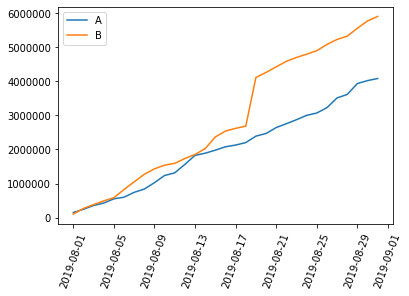

In [18]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=70)
plt.legend()

#### По данным графикам видно что выборки параллельно растут, выборка В имела один большой всплеск около 19.08.2019

In [19]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [20]:
revenue_visitor_a = orders.query('group == "A"').groupby('date', as_index = False).agg({'revenue' : 'sum'})
revenue_visitor_b = orders.query('group == "B"').groupby('date', as_index = False).agg({'revenue' : 'sum'})

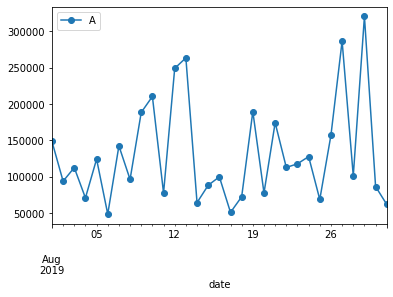

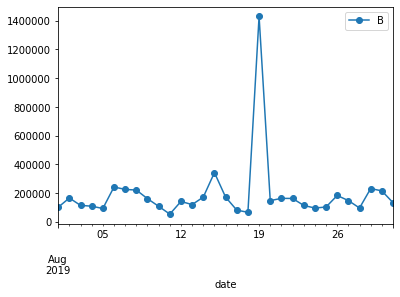

In [21]:
revenue_visitor_a.plot(x='date', 
         y='revenue', 
         style = 'o-',
         label='A'
         )
revenue_visitor_b.plot(x='date', 
         y='revenue',
         style = 'o-', 
         label='B')

#### Причина всплеска - один очень дорогой заказ, посмотрим дальнейшие метрики без него

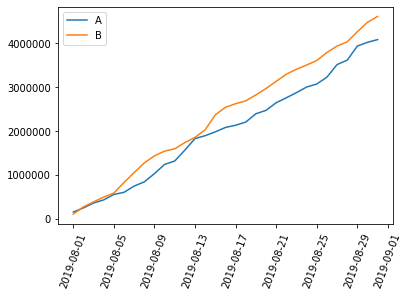

In [22]:
orders = orders.query('revenue < 1000000')

datesGroups = orders[['date','group']].drop_duplicates()
 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transactionId' : pd.Series.nunique, 
                                           'visitorId' : pd.Series.nunique, 
                                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 
                                             'group' : 'max', 
                                             'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeData['average_check'] = cummulativeData['revenue'] / cummulativeData['orders']

cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=70)
plt.legend()

#### Так намного нагляднее, даже несмотря на то что мы у группы В отобрали очень большой заказ, она все равно немного лидирует

## 2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

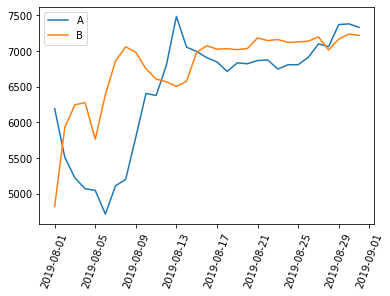

In [23]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','average_check']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','average_check']]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['average_check'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['average_check'], label='B')
plt.xticks(rotation=70)
plt.legend()

#### По данным графикам видно что выборки поочередно проявляют всплески

## 3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

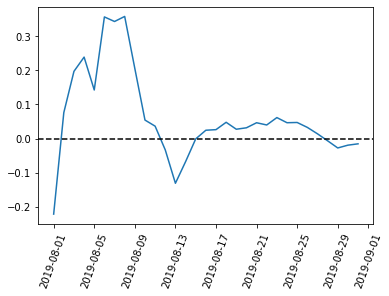

In [24]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, 
                                                     left_on='date', 
                                                     right_on='date', 
                                                     how='left', 
                                                     suffixes=['A', 'B'])

plt.plot(mergedCummulativeRevenue['date'], 
         (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/
         (mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.xticks(rotation=70)
plt.axhline(y=0, color='black', linestyle='--')

#### Результаты теста часто значительно менялись, но постепенно график стремится к 0

## 4.Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

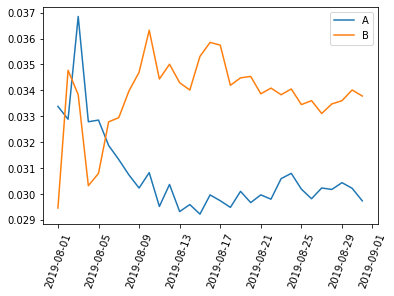

In [25]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.xticks(rotation=70)
plt.legend()

#### Результаты показывают что посетители группы В делали больше заказов, чем группы А, теперь ясно почему средний чек в А выше

## 5.Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

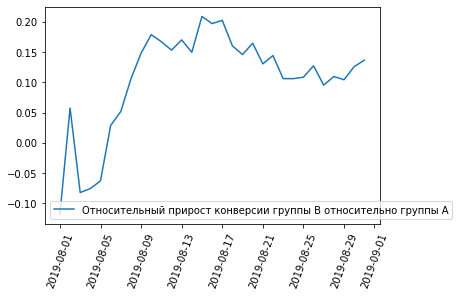

In [26]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], 
                                                                             left_on='date', 
                                                                             right_on='date', 
                                                                             how='left', 
                                                                             suffixes=['A', 'B'])

plt.plot(mergedCummulativeConversions['date'], 
         mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=70)
plt.legend()

#### В выигрывает, но очень незначительно

## 6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [27]:
orders_visitor_id = orders.groupby('visitorId').agg({'transactionId' : 'nunique'})

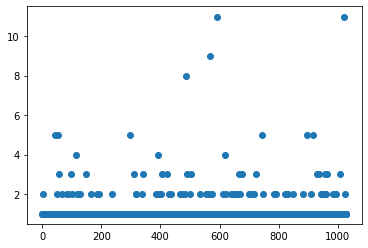

In [28]:
x_values = pd.Series(range(0,len(orders_visitor_id['transactionId'])))
plt.scatter(x_values, orders_visitor_id['transactionId'])

#### Видно что больше 5 заказов мало кто делал

## 7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [29]:
np.percentile(orders_visitor_id['transactionId'], [95, 99])

array([2., 4.])

#### Посколько данные очень кучные выберем 99-й проценталь

## 8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

In [30]:
revenue_visitor_id = orders.groupby('visitorId').agg({'revenue' : 'sum'})

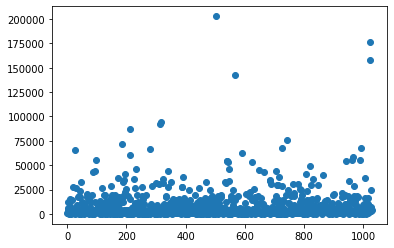

In [31]:
x_values = pd.Series(range(0,len(revenue_visitor_id['revenue'])))
plt.scatter(x_values, revenue_visitor_id['revenue'])

#### Видно что больше 100000 мало кто тратил

## 9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [32]:
np.percentile(revenue_visitor_id['revenue'], [95, 99])

array([32618.95, 66946.4 ])

#### Посколько данные очень кучные выберем 99-й проценталь

## 10.Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [33]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [34]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [35]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [36]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [37]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [38]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [39]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, 
                               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],
                    axis=0)

In [40]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.009
0.136


#### Альфу для сравнения выборок примем равной 0.01

#### По «сырым» данным различия есть в конверсии групп A и B, p-value = 0.009, это меньше 0.01.
#### Относительный проигрыш группы А 13%

## 11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [41]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.382
-0.016


#### P-value значительно больше 0.01. Значит, что в среднем чеке нет различий. Приэтом относительный прирост группы А составляет 1%

## 12.Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [42]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [43]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, 
                                       index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0)

In [44]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.011
0.149


#### По «очищенным» данным различий в конверсии групп A и B  нет , p-value = 0.011, это больше 0.01.
#### Относительный проигрыш группы А 15%

## 13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [45]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.433
-0.002


#### P-value по «очищенным» так же значительно больше 0.05. Значит, что в среднем чеке нет различий. Приэтом относительный прирост групп отсутствует.

## 14.Примите решение по результатам теста и объясните его. 

### Остановить тест, зафиксировать отсутствие различий между группами. 

# ОБЩИЙ ВЫВОД
#### Наиболее эффективные гипотезы по ICE с индексом: 8, 0, 7, 6.
#### Наиболее эффективные гипотезы по RICE с индексом: 7, 2, 0, 6.
#### Гипотеза 8 ушла из топа, так как параметр reach у нее равен 1, гипотезы 7 и 2 наоборот поднялись из-за высокого показателя reach 10 и 2 соответственно.

#### Коммулятивная выручка по группе В немного лидирует.
#### Коммулятивный средний чек пока не стабилизировался.
#### Результаты относительного изменения часто значительно менялись, но постепенно график стремится к 0.
#### Результаты кумулятивной конверсии по группам показывают что посетители группы В делали больше заказов, чем группы А, поэтому средний чек в А выше.
#### Пока группа В выигрывает, но очень незначительно.

#### Больше 5 заказов мало кто делал.
#### Больше 100000 мало кто тратил.

#### Альфу для сравнения выборок примем равной 0.01.

#### По «сырым» данным различия есть в конверсии групп A и B, p-value = 0.009, это меньше 0.01.
#### Относительный проигрыш группы А 13%
#### P-value значительно больше 0.01. Значит, что в среднем чеке нет различий. Приэтом относительный прирост группы А составляет 1%

#### По «очищенным» данным различий в конверсии групп A и B  нет , p-value = 0.011, это больше 0.01.
#### Относительный проигрыш группы А 15%
#### P-value по «очищенным» так же значительно больше 0.05. Значит, что в среднем чеке нет различий. Приэтом относительный прирост групп отсутствует.

#### Я бы советовал становить тест, зафиксировать отсутствие различий между группами и зафиксировать явные различия в среднем чеке.